# Exploring the Dataset
---

In [123]:
# imports
import os
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import plotly.express as px

In [124]:
# annotated features
annot = pd.read_pickle(os.path.join('dataset', 'task_2_annotations_82d1d6d1093eaab6_e330cbf_pandas.pkl'))
annot_df = pd.DataFrame.from_dict(annot)
annot_df

,pianist_id,segment_id,annotator_id,arousal,valence,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness,gemmes_flow,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering
0,1,0,91,1,-1,2,1,2,4,2.0,1,1,1,2,3,2,1,1.0,2
31,1,0,19,2,-1,3,3,3,4,4.0,1,2,3,3,3,2,2,3.0,3
62,1,0,189,2,0,2,1,2,1,4.0,2,2,1,1,3,2,1,1.0,4
93,1,0,126,2,2,4,5,2,3,5.0,2,4,1,3,5,1,2,2.0,5
124,1,0,26,4,2,3,5,2,3,3.0,1,3,4,1,4,1,2,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3888,11,26,36,3,-1,3,2,1,4,1.0,3,2,3,5,4,2,2,5.0,3
3919,11,26,55,2,0,2,2,2,3,3.0,3,1,3,1,2,3,2,1.0,1
3950,11,26,136,2,1,2,1,1,2,2.0,2,2,1,1,2,2,1,2.0,2
3981,11,26,169,2,0,2,1,2,2,1.0,3,4,3,2,2,3,3,1.0,1


In [125]:
# calculated features
pandas_features = pd.read_pickle(os.path.join('dataset', 'task_2_features_1d8b658c21ddc127_e330cbf_pandas.pkl'))
pandas_feature_df = pd.DataFrame.from_dict(pandas_features)
pandas_feature_df

,pianist_id,segment_id,snippet_id,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,...,mirtoolbox_novelty_std,mirtoolbox_novelty_pct_10,mirtoolbox_novelty_pct_50,mirtoolbox_novelty_pct_90,mirtoolbox_pulseclarity,mirtoolbox_roughness_mean,mirtoolbox_roughness_std,mirtoolbox_roughness_pct_10,mirtoolbox_roughness_pct_50,mirtoolbox_roughness_pct_90
0,1,0,0,0.192237,0.059404,2.040252,16079768.0,0.800000,0.677256,0.095846,...,0.106446,0.00000,0.013819,0.082176,0.169743,0.011449,0.004161,0.006684,0.011048,0.017025
1,1,0,1,0.143425,0.064204,3.138845,35489248.0,2.600000,0.514913,0.092372,...,0.193342,0.00000,0.027786,0.356029,0.355861,0.006205,0.003194,0.002583,0.005657,0.010610
2,1,0,2,0.146967,0.056205,2.019706,42130144.0,2.600000,0.560116,0.115359,...,0.218179,0.00000,0.049050,0.375251,0.209162,0.007467,0.003986,0.002330,0.007206,0.012690
3,1,0,3,0.158810,0.059129,3.567908,40922732.0,1.400000,0.596779,0.116061,...,0.118148,0.00002,0.017653,0.098657,0.232454,0.007335,0.004063,0.002609,0.006807,0.012971
4,1,0,4,0.168547,0.049648,2.329854,51921612.0,1.600000,0.556160,0.143420,...,0.121018,0.00000,0.020525,0.157408,0.140930,0.007345,0.003917,0.002662,0.007016,0.012731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4175,11,26,2,0.202177,0.050760,2.840705,51977460.0,1.800000,0.688834,0.090235,...,0.203668,0.00000,0.052074,0.377220,0.269012,0.014044,0.004991,0.007948,0.013532,0.020522
4176,11,26,3,0.174454,0.063426,5.202462,9471357.0,3.200000,0.661253,0.107627,...,0.161435,0.00000,0.029478,0.251830,0.353269,0.011126,0.004529,0.005563,0.011076,0.016763
4177,11,26,4,0.161152,0.074724,4.605277,7378860.5,2.600000,0.645111,0.093705,...,0.130765,0.00000,0.025099,0.151084,0.319188,0.009205,0.004808,0.004193,0.008083,0.016254
4178,11,26,5,0.192846,0.056795,2.563405,22641664.0,3.200000,0.680604,0.094989,...,0.247554,0.00000,0.084562,0.600001,0.133573,0.013538,0.004881,0.007919,0.012861,0.019997


### Dataset Preprocessing
---

In [126]:
# add the labels to the dataset
def label_race(row):
   if row['valence'] <= 0 and row['arousal'] > 3:
        return 'angry'
   elif row['valence'] > 0 and row['arousal'] >= 3:
       return 'happy'
   elif row['valence'] < 0 and row['arousal'] <= 3:
       return 'sad'
   elif row['valence'] >= 0 and row['arousal'] < 3:
       return 'relaxed'
   else:
       return 'None'

annot_df['class'] = annot_df.apply(lambda row: label_race(row), axis=1)
annot_df

,pianist_id,segment_id,annotator_id,arousal,valence,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness,gemmes_flow,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering,class
0,1,0,91,1,-1,2,1,2,4,2.0,1,1,1,2,3,2,1,1.0,2,sad
31,1,0,19,2,-1,3,3,3,4,4.0,1,2,3,3,3,2,2,3.0,3,sad
62,1,0,189,2,0,2,1,2,1,4.0,2,2,1,1,3,2,1,1.0,4,relaxed
93,1,0,126,2,2,4,5,2,3,5.0,2,4,1,3,5,1,2,2.0,5,relaxed
124,1,0,26,4,2,3,5,2,3,3.0,1,3,4,1,4,1,2,3.0,1,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3888,11,26,36,3,-1,3,2,1,4,1.0,3,2,3,5,4,2,2,5.0,3,sad
3919,11,26,55,2,0,2,2,2,3,3.0,3,1,3,1,2,3,2,1.0,1,relaxed
3950,11,26,136,2,1,2,1,1,2,2.0,2,2,1,1,2,2,1,2.0,2,relaxed
3981,11,26,169,2,0,2,1,2,2,1.0,3,4,3,2,2,3,3,1.0,1,relaxed


In [127]:
# normalize dataset
annot_df2 = annot_df.copy()
annot_df2 = annot_df2.drop(['class'], axis=1)
annot_df2 = (annot_df2-annot_df2.mean())/annot_df2.std()
annot_df2

,pianist_id,segment_id,annotator_id,arousal,valence,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness,gemmes_flow,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering
0,-1.584129,-1.665261,-0.107767,-1.629596,-0.928178,-0.711373,-1.354151,-0.282325,0.930731,-0.289144,-1.065984,-1.030209,-1.130637,-0.125896,0.023672,-0.444882,-1.134149,-1.342541,-0.387798
31,-1.584129,-1.665261,-1.385706,-0.785024,-0.928178,0.077778,0.264082,0.488661,0.930731,1.172934,-1.065984,-0.223294,0.285612,0.723497,0.023672,-0.444882,-0.343482,0.246097,0.393723
62,-1.584129,-1.665261,1.631651,-0.785024,-0.018956,-0.711373,-1.354151,-0.282325,-1.256266,1.172934,-0.254421,-0.223294,-1.130637,-0.975288,0.023672,-0.444882,-1.134149,-1.342541,1.175244
93,-1.584129,-1.665261,0.513454,-0.785024,1.799487,0.866930,1.882316,-0.282325,0.201732,1.903973,-0.254421,1.390537,-1.130637,0.723497,1.528432,-1.237854,-0.343482,-0.548222,1.956766
124,-1.584129,-1.665261,-1.261462,0.904122,1.799487,0.077778,1.882316,-0.282325,0.201732,0.441895,-1.065984,0.583622,0.993737,-0.975288,0.776052,-1.237854,-0.343482,0.246097,-1.169319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3888,1.560763,1.665261,-1.083970,0.059549,-0.928178,0.077778,-0.545034,-1.053310,0.930731,-1.020183,0.557142,-0.223294,0.285612,2.422283,0.776052,-0.444882,-0.343482,1.834735,0.393723
3919,1.560763,1.665261,-0.746736,-0.785024,-0.018956,-0.711373,-0.545034,-0.282325,0.201732,0.441895,0.557142,-1.030209,0.285612,-0.975288,-0.728708,0.348090,-0.343482,-1.342541,-1.169319
3950,1.560763,1.665261,0.690945,-0.785024,0.890265,-0.711373,-1.354151,-1.053310,-0.527267,-0.289144,-0.254421,-0.223294,-1.130637,-0.975288,-0.728708,-0.444882,-1.134149,-0.548222,-0.387798
3981,1.560763,1.665261,1.276667,-0.785024,-0.018956,-0.711373,-1.354151,-0.282325,-0.527267,-1.020183,0.557142,1.390537,0.285612,-0.125896,-0.728708,0.348090,0.447186,-1.342541,-1.169319


### Feature Correlations
---

In [128]:
annot_df_corr = annot_df2.copy()
annot_df_corr = annot_df_corr.drop(['pianist_id', 'segment_id', 'annotator_id'], axis=1)

def get_arousal_valence_corr(df):
    corr_x, corr_y, feature, factor = [], [], [], []
    model = df.columns.to_list()[0:2]
    features = df.columns.to_list()[2:16]
    for idx, x in enumerate(features):
        for idy, y in enumerate(model):
            if idy == 0:
                corr_arousal = df[y].corr(df[x])
            elif idy == 1:
                corr_valence = df[y].corr(df[x])    
        corr_x.append(corr_valence)
        corr_y.append(corr_arousal)
        feature.append(x.split('_')[1])
        if 'gems' in x:
            factor.append('gems')
        else:
            factor.append('gemmes')
    return corr_x, corr_y, feature, factor

corr_valence, corr_arousal, feature, factor = get_arousal_valence_corr(annot_df_corr)

In [129]:
# create new DataFrame of calculated feature correlations
corr_df = pd.DataFrame({'feature_name': feature, 'factor': feature_type, 'corr_valence': corr_valence, 'corr_arousal': corr_arousal})
corr_df

,feature_name,factor,corr_valence,corr_arousal
0,wonder,gems,0.393563,0.147268
1,transcendence,gems,0.250509,0.273471
2,tenderness,gems,0.325340,-0.112573
3,nostalgia,gems,0.043540,-0.196235
4,peacefulness,gems,0.255045,-0.293983
5,power,gems,-0.005944,0.475225
6,joyful,gems,0.399462,0.250030
7,tension,gems,-0.407697,0.268296
8,sadness,gems,-0.463651,-0.082546
9,flow,gemmes,0.258827,-0.155390


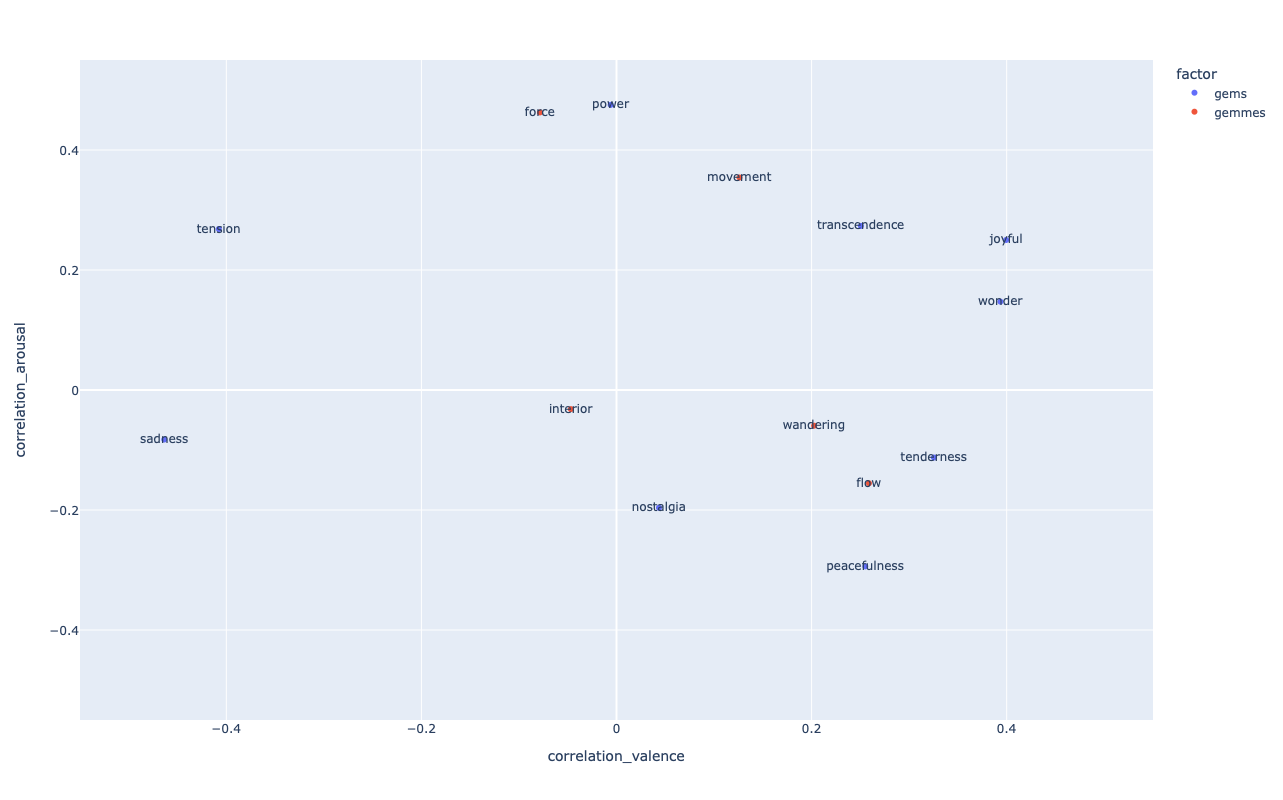

In [130]:
# plot feature correlations
fig = px.scatter(corr_df, x='corr_valence', y='corr_arousal', color='factor', text='feature_name', width=850, height=800)
fig.update_xaxes(range = [-0.55,0.55], title="correlation_valence")
fig.update_yaxes(range = [-0.55,0.55], title="correlation_arousal")
fig.show()

### Appendix
---

In [131]:
annot_df_mean = annot_df.copy()
annot_df_mean = annot_df_mean.drop(['pianist_id', 'annotator_id'], axis=1)

df_angry = annot_df_mean.loc[annot_df['class'] == 'angry']
group_mean_angry = df_angry.groupby(['segment_id']).mean()

df_happy = annot_df_mean.loc[annot_df['class'] == 'happy']
group_mean_happy = df_happy.groupby(['segment_id']).mean()

df_sad = annot_df_mean.loc[annot_df['class'] == 'sad']
group_mean_sad = df_sad.groupby(['segment_id']).mean()

df_relaxed = annot_df_mean.loc[annot_df['class'] == 'relaxed']
group_mean_relaxed = df_relaxed.groupby(['segment_id']).mean()

df_none = annot_df_mean.loc[annot_df['class'] == 'none']
group_mean_none = df_none.groupby(['segment_id']).mean()

group_mean_happy

,arousal,valence,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness,gemmes_flow,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering
segment_id,,,,,,,,,,,,,,,,
0,3.750000,1.416667,3.333333,3.166667,2.916667,2.750000,3.166667,2.416667,3.250000,2.000000,1.916667,3.333333,2.500000,2.500000,3.000000,3.000000
1,4.032258,1.290323,3.806452,3.677419,2.903226,2.967742,2.666667,2.580645,3.000000,1.967742,1.516129,3.580645,3.064516,2.967742,2.677419,2.548387
2,3.818182,1.212121,3.484848,2.969697,2.030303,2.090909,1.666667,2.787879,3.636364,2.454545,1.303030,2.636364,3.484848,2.787879,1.939394,2.818182
3,3.933333,1.400000,3.200000,3.066667,2.200000,2.066667,1.466667,3.800000,3.333333,2.666667,1.800000,2.066667,3.333333,3.466667,2.066667,2.266667
4,3.882353,1.294118,4.000000,3.352941,3.147059,3.088235,2.617647,2.352941,2.323529,1.617647,1.794118,3.705882,2.382353,2.588235,3.235294,3.235294
5,3.666667,1.259259,3.481481,3.222222,2.814815,2.518519,2.851852,2.962963,3.814815,1.592593,1.370370,3.444444,3.370370,2.851852,2.148148,3.111111
6,3.625000,1.583333,3.250000,2.666667,4.125000,3.541667,3.958333,1.583333,2.083333,1.291667,1.916667,4.000000,1.833333,1.750000,3.291667,2.958333
7,3.821429,1.178571,3.857143,3.392857,3.250000,3.214286,2.642857,2.750000,2.678571,1.535714,1.535714,3.821429,2.785714,2.535714,2.750000,2.714286
8,3.947368,1.315789,3.491228,3.263158,2.350877,1.614035,1.754386,2.929825,3.789474,2.315789,1.192982,2.859649,3.807018,2.666667,2.087719,2.280702


In [132]:
def calc_correlation_dataset(df):
    
    list_x, list_y = [], []
    classifiers = df.columns.to_list()[0:2]
    gems_gemmes = df.columns.to_list()[2:16]
    
    for idx, x in enumerate(gems_gemmes):
        for idy, y in enumerate(classifiers):
            if idy == 0:
                corr_arousal = df[y].corr(df[x])
                list_y.append(corr_arousal)
            elif idy == 1:
                corr_valence = df[y].corr(df[x])
                list_x.append(corr_valence)
    return list_x, list_y

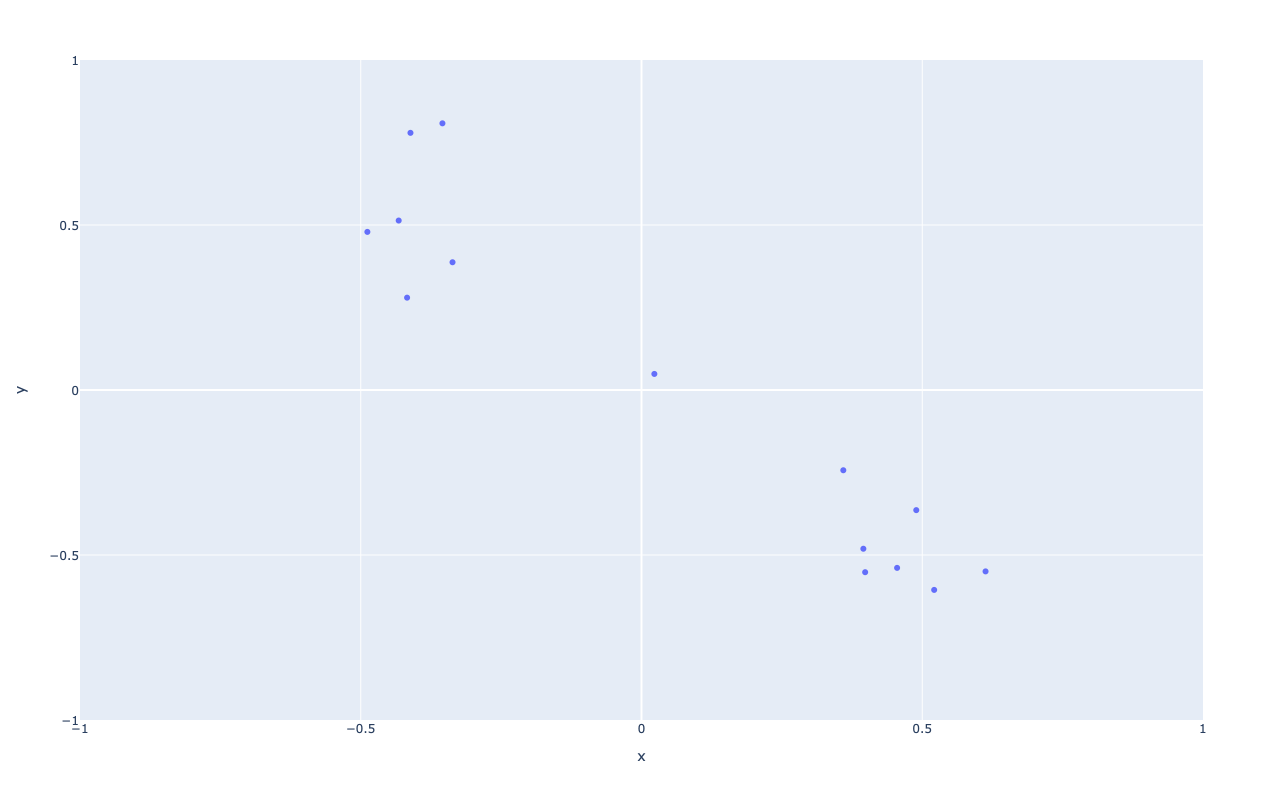

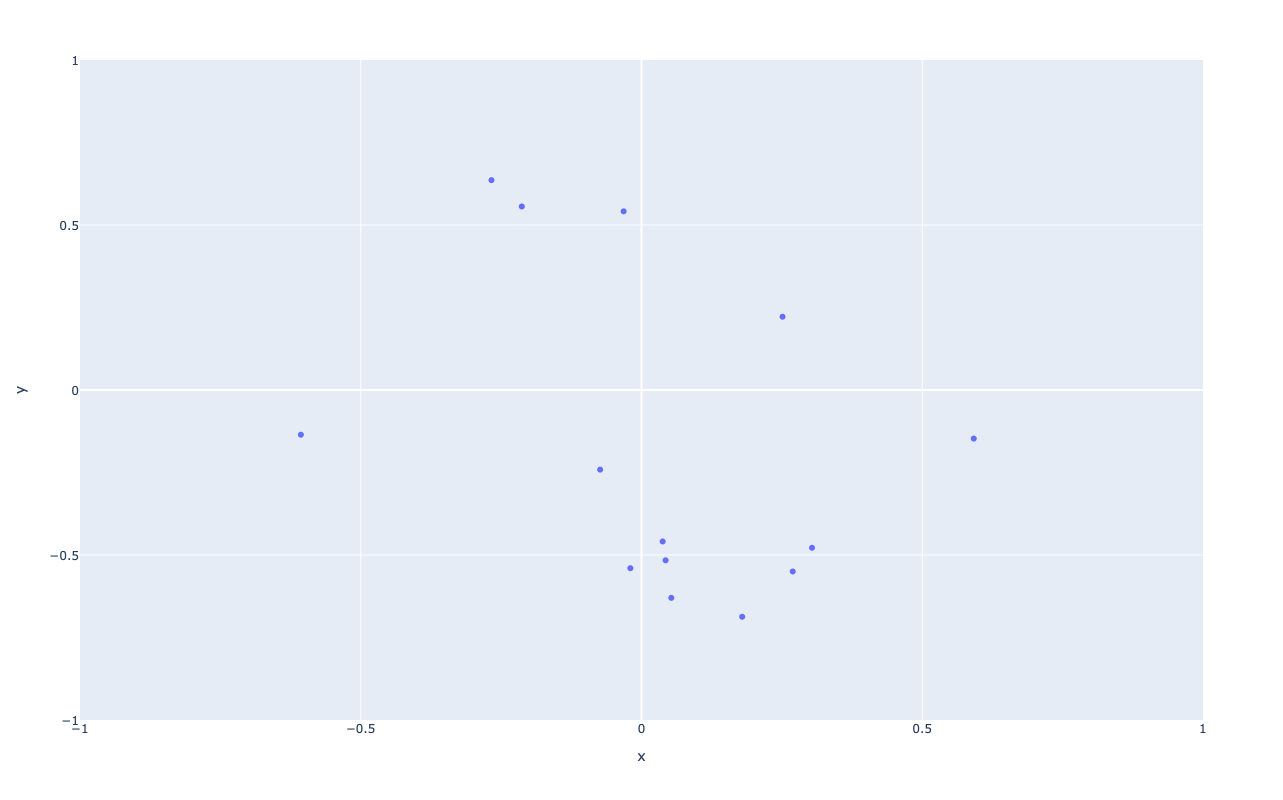

In [133]:
x1, y1 = calc_correlation_dataset(group_mean_happy.copy())
x2, y2 = calc_correlation_dataset(group_mean_angry.copy())
            
fig = px.scatter(x=x1, y=y1, width=800, height=800)
fig.update_xaxes(range = [-1,1])
fig.update_yaxes(range = [-1,1])
fig.show()

            
fig = px.scatter(x=x2, y=y2, width=800, height=800)
fig.update_xaxes(range = [-1,1])
fig.update_yaxes(range = [-1,1])
fig.show()

In [ ]:
# df_collection = [df_angry, df_happy, df_sad, df_relaxed, df_none]

# for item in df_collection:
#    print(item.shape)

In [ ]:
# test = df_happy.groupby(['pianist_id']).mean()
# test

In [ ]:
# show NaN values
# temp = pandas_annot_df.drop(['class'], axis=1)
# temp[temp.isna().any(axis=1)]

In [ ]:
# normalize the dataset
# df = pandas_annot_df.drop(['pianist_id','segment_id','annotator_id','arousal','valence','class'], axis=1)

# norm_df_annotations = (df-df.mean())/df.std()
# norm_df_annotations

In [ ]:
# correlation matrix
# corr_annotations = norm_df_annotations.corr()
# corr_annotations

# plot matrix
# plt.figure(figsize=(12, 6))

# heatmap = sns.heatmap(corr_annotations, vmin=-1, vmax=1, annot=True, cmap="Blues")
# heatmap.set_title('GEMS9 and GEMMES - Correlation Heatmap', fontdict={'fontsize':12}, pad=15)
# plt.show()